In [1]:
import pickle

data = pickle.load(open('/home/don/Desktop/electrons_config1_1_to_500GeV_4Tesla.pickle', 'rb'))

In [3]:
print(data['digi'].shape)
print(data['meta']) # pdgID, energy, p_x, p_y, p_z, phi

y = data['meta'][:800, 1] # all energies.
y_test = data['meta'][800:, 1]
# print(y)
print(y.shape)
print(y_test.shape)

(1000, 30, 19, 3, 3, 4, 4)
[[ 1.1000000e+01  3.1319540e+02  6.3900591e-04 -6.8322616e-04
  -1.0465975e+01  1.1190237e+01]
 [ 1.1000000e+01  3.3460062e+02  1.3464493e-03 -6.7509228e-04
  -2.6080494e+01  1.3076426e+01]
 [ 1.1000000e+01  1.1272136e+02  3.1010923e-03 -4.1274866e-04
  -1.8677830e+01  2.4859827e+00]
 ...
 [ 1.1000000e+01  1.1916441e+02  1.9292883e-03 -2.9151912e-03
  -1.2644467e+01  1.9106016e+01]
 [ 1.1000000e+01  3.0605188e+02  1.2663823e-03 -1.4682056e-03
  -2.4076078e+01  2.7913080e+01]
 [ 1.1000000e+01  1.6695699e+02  1.7947395e-03  2.2582130e-03
  -1.7095289e+01 -2.1509972e+01]]
(800,)
(200,)


Text(0.5, 0, 'Energy [GeV]')

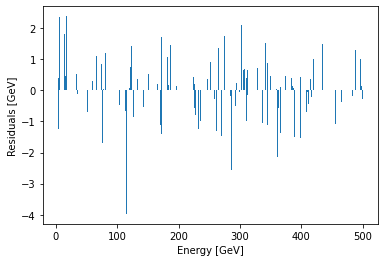

In [30]:
import matplotlib.pyplot as plt
import numpy as np

noise = np.random.normal(0, 1., 200)
y_pred = y_test + noise
residuals = y_test-y_pred
plt.bar(y_test, residuals)
plt.ylabel('Residuals [GeV]')
plt.xlabel('Energy [GeV]')

In [1]:
import keras
import keras.backend as K
import tensorflow as tf

class Reshaper(keras.models.Model):
    def __init__(self, input_shape, output_shape):
        model_in  = keras.layers.Input(shape=input_shape)
        model_out = K.concatenate((K.variable([-1], dtype='int32'), output_shape))
        shaper = keras.layers.Lambda(lambda x: K.reshape(x, model_out))(model_in)
        super(Reshaper, self).__init__(inputs=model_in, outputs=shaper)

In [5]:
import numpy as np

a = np.random.rand(1,30,19,3,3,4,4,1)

In [7]:
latent_dims = [8,8,8]
r1 = Reshaper([30,19,3,3,4,4,1], [3*4,4,1])
r2 = Reshaper(latent_dims[0], [3*19*latent_dims[1]])
r2 = Reshaper(latent_dims[1], [30*latent_dims[2]])

(1710, 12, 4, 1)
